<a href="https://colab.research.google.com/github/Valeram12/neural-networks/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

None


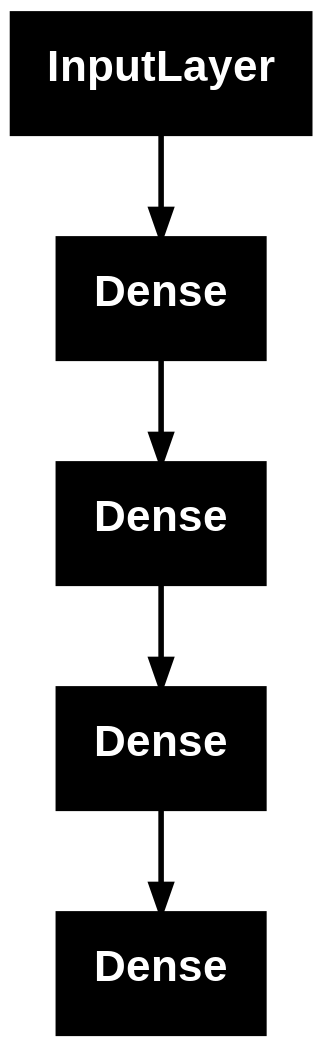

In [2]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Завантажимо датасет Fashion MNIST
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

# Центруємо і нормуємо вхідні дані, так, щоб значення змінювалися від -0.5 до +0.5.
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255 - 0.5
x_val = x_val.reshape(-1, 28*28).astype('float32') / 255 - 0.5

# Створення моделі
model = models.Sequential()
model.add(layers.Dense(128, input_dim=784, activation='relu'))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчимо модель, при цьому розмір міні батча візьмемо рівним 64 і встановимо кількість епох навчання рівне 10.
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Точність отриманої моделі
test_loss, test_acc = model.evaluate(x_val, y_val)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7794 - loss: 0.6209 - val_accuracy: 0.8391 - val_loss: 0.4414
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8596 - loss: 0.3838 - val_accuracy: 0.8586 - val_loss: 0.3876
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8733 - loss: 0.3410 - val_accuracy: 0.8679 - val_loss: 0.3704
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8828 - loss: 0.3119 - val_accuracy: 0.8731 - val_loss: 0.3522
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8920 - loss: 0.2889 - val_accuracy: 0.8771 - val_loss: 0.3417
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8966 - loss: 0.2789 - val_accuracy: 0.8757 - val_loss: 0.3493
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9000 - loss: 0.2683 - val_accuracy: 0.8805 - val_loss: 0.3360
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9043 - loss: 0.2505 - val_accuracy: 0.